In [59]:
from sklearn.datasets._samples_generator import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import imageio
import time
import tqdm
import glob
import cv2
import os

In [60]:
import warnings
warnings.filterwarnings("ignore")

In [61]:
class LogisticRegression() :
    
    def __init__( self, learning_rate=0.01, iterations=500 ) :
        
        self.learning_rate = learning_rate
          
        self.iterations = iterations
        
        self.grad_hist = [] 
          
    # Function for model training 
    
    def fit( self, X, Y ) :      
        
        # no_of_training_examples, no_of_features  
        
        self.m, self.n = X.shape      
        
        self.W = np.zeros( self.n ) 
        
        self.b = 0
        
        self.X = X
        
        self.Y = Y
          
        # gradient descent learning
        
        param = (self.W,self.b)
        self.grad_hist.append(param)  
        
        for i in range( self.iterations ):
            
            self.update_weights()
            param = (self.W,self.b)
            self.grad_hist.append(param)
            
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) : 
        
        Z = self.X.dot( self.W ) + self.b
        
        A = 1 / (1 + np.exp(-Z))
          
        # calculate gradients        
        tmp = ( A - self.Y.T )        
        tmp = np.reshape( tmp, self.m )        
        dW = np.dot( self.X.T, tmp ) / self.m         
        db = np.sum( tmp ) / self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db
          
        return self
      
    # Hypothetical function  h( x ) 
      
    def predict( self, X ):
        Z = X.dot(self.W) + self.b
        A = 1/(1 + np.exp(-Z))       
        Y = np.where( A > 0.5, 1, 0 )        
        return Y
    
    

In [91]:
def predict(X,param):
    W = param[0]
    b = param[1]
    Z = X.dot(W) + b
    Z = 1/(1 + np.exp(-Z))
    Y = np.where( Z > 0.5, 1, 0 )
    return Y

def process_frames(X,Y,grad_hist,frame_save_path):
    i=0
    for i in tqdm.tqdm(range(len(grad_hist)), desc='Processing Frames'):
        w1, w2 = grad_hist[i][0]
        b = grad_hist[i][1]
        c = -b/w2
        m = -w1/w2
        fig = plt.figure(figsize=(10, 6),dpi=100, facecolor=None)
        fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
        xmin, xmax = -20, 9
        ymin, ymax = -23, 17
        x = np.array([xmin, xmax])
        y = m*x + c
        plt.plot(x, y, color='black', lw=2, ls='-')
        plt.fill_between(x, y, ymin, color='tab:blue', alpha=0.2)
        plt.fill_between(x, y, ymax, color='tab:orange', alpha=0.2)
        plt.scatter(*X[Y==0].T, s=20, alpha=0.8)
        plt.scatter(*X[Y==1].T, s=20, alpha=0.8)
        plt.xlim(xmin, xmax)
        plt.ylim(ymin, ymax)
        plt.ylabel(r'$x_2$')
        plt.xlabel(r'$x_1$')
        plt.xticks(())
        plt.yticks(())
        fpath = os.path.join(frame_save_path,f"{i}.jpg")
        plt.savefig(fpath)
        i+=1;
        #plt.show()
        #plt.pause(0.05)
        plt.clf()   
    return None


def write_video(video_path,frame_save_path,fps):
    
    num_frames = len(glob.glob(frame_save_path+"/*"))

    img=[]
    for i in tqdm.tqdm(range(num_frames), desc='Appending Frames'):
        fpath = os.path.join(frame_save_path,f"{i}.jpg")
        img.append(cv2.imread(fpath))

    height,width,layers=img[1].shape
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    size = (width,height)
    fps = fps
    video = cv2.VideoWriter(video_path, fourcc, fps , size)

    for j in tqdm.tqdm(range(len(img)), desc='Writing Video'):
        video.write(img[j])

    cv2.destroyAllWindows()
    video.release()
    return None


def write_gif(gif_path,frame_save_path,fps):
    d = 1/fps
    num_frames = len(glob.glob(frame_save_path+"/*"))
    with imageio.get_writer(gif_path, mode='I', duration=d) as writer:
        for i in tqdm.tqdm(range(num_frames), desc='Writing GIF'):
            fpath = os.path.join(frame_save_path,f"{i}.jpg")
            image = imageio.imread(fpath)
            writer.append_data(image)
    return None


def play_video(video_path,fps):   
    cap = cv2.VideoCapture(video_path)

    while cap.isOpened():

        ret,frame = cap.read()

        if ret == True:

            cv2.imshow('frame',frame)
            wait_ms = int(1000/fps)
            if cv2.waitKey(wait_ms) & 0xFF == ord("q"):    # Don't use "and" instead of "&"
                break
        else:
            break

    cap.release()
    cv2.destroyAllWindows()
    
    return None


def plot_data(X,Y,grad_hist=False):
    
    fig = plt.figure(figsize=(10, 6),dpi=100, facecolor=None, edgecolor='red')
    fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
    
    if not type(grad_hist)==bool:
        b = grad_hist[-1][1]
        w1, w2 = grad_hist[-1][0]
        c = -b/w2
        m = -w1/w2
        xmin, xmax = -20, 9
        ymin, ymax = -23, 17
        x = np.array([xmin, xmax])
        y = m*x + c
        plt.plot(x, y, color='green', lw=2, ls='-')
        plt.fill_between(x, y, ymin, color='blue', alpha=0.2)
        plt.fill_between(x, y, ymax, color='orange', alpha=0.2)
        plt.xlim(xmin, xmax)
        plt.ylim(ymin, ymax)
    
    plt.scatter(*X[Y==0].T, s=20, alpha=0.8)
    plt.scatter(*X[Y==1].T, s=20, alpha=0.8)
    plt.ylabel(r'$x_2$')
    plt.xlabel(r'$x_1$')
    plt.xticks(())
    plt.yticks(())
    plt.show()
    return None

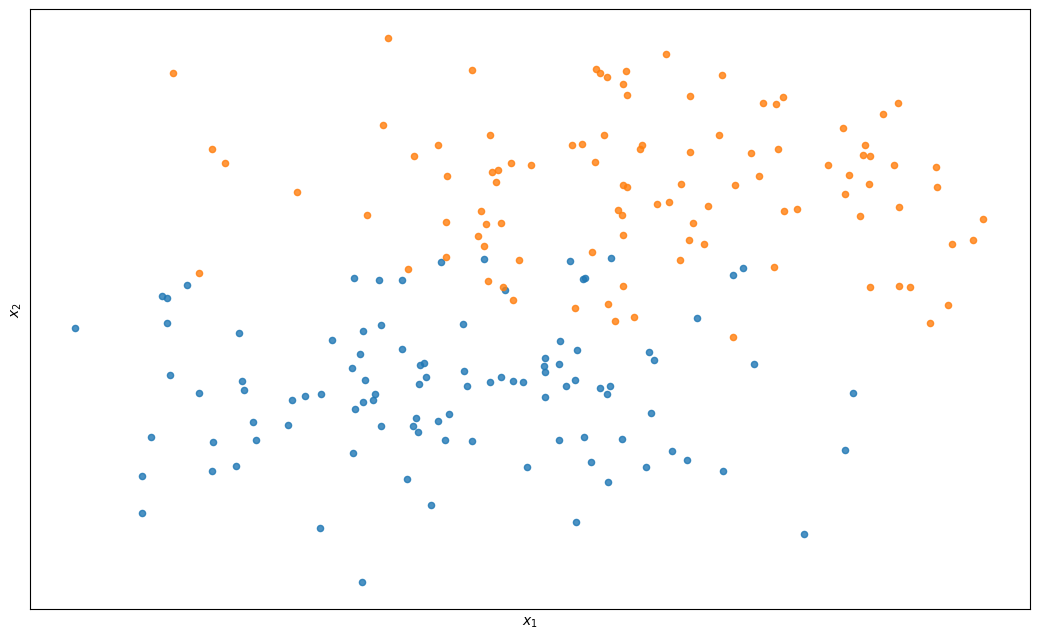

In [92]:
X, Y = make_blobs(n_samples=200, centers=2, n_features=2, cluster_std=5 , random_state=11)
plot_data(X,Y)

In [93]:
X, Y = make_blobs(n_samples=200, centers=2, n_features=2, cluster_std=5 , random_state=11)

model = LogisticRegression( iterations = 200, learning_rate = 0.3 ) 
model.fit( X,Y)  
grad_hist = model.grad_hist
Y_pred = model.predict(X)

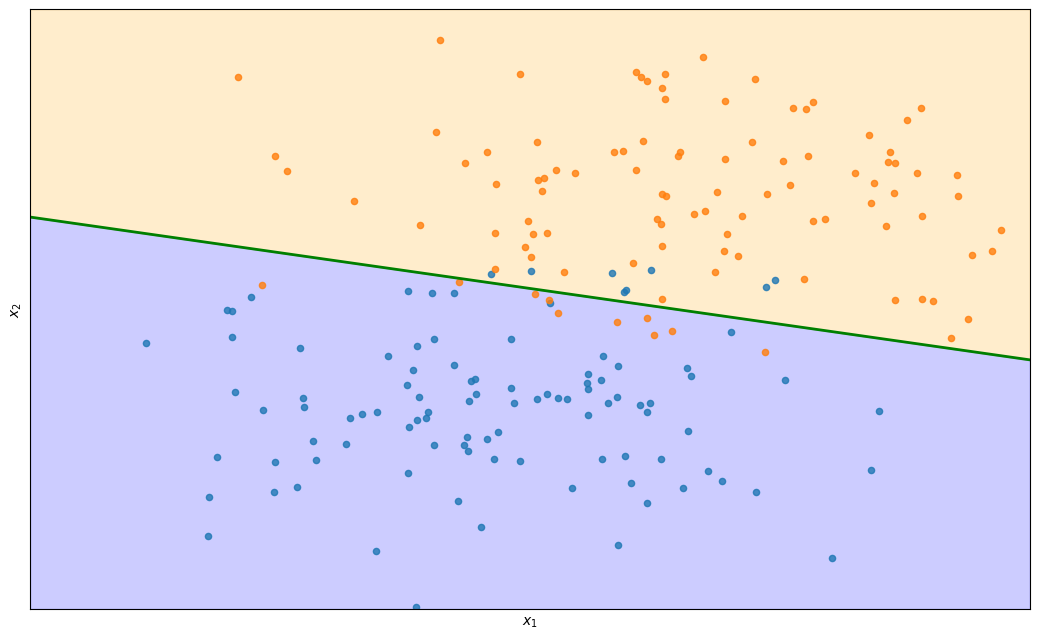

In [94]:
plot_data(X,Y,grad_hist)

In [95]:
X, Y = make_blobs(n_samples=200, centers=2, n_features=2, cluster_std=5 , random_state=11)

model = LogisticRegression( iterations = 200, learning_rate = 0.3) 
model.fit( X,Y)  
grad_hist = model.grad_hist
Y_pred = model.predict(X)


frame_save_path = 'logistic frames'
video_path = 'logistic.mp4'
gif_path = 'logistic.gif'
fps = 20

if not os.path.exists(frame_save_path):
    os.mkdir(frame_save_path)


def main(play=True):
    
    start = time.time()
    process_frames(X,Y,grad_hist,frame_save_path)
    write_video(video_path,frame_save_path,fps)
    write_gif(gif_path,frame_save_path,fps)
    end = time.time()
    
    print(f"Total elapsed time = {end-start} seconds")
    
    if play:
        play_video(video_path,fps)
        
    return None


if __name__== '__main__':
    main()

Writing GIF: 100%|███████████████████████████████████████████████████████████████████| 201/201 [00:37<00:00,  5.34it/s]


Total elapsed time = 103.29527115821838 seconds


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>